

# Exploring Data , Nepal Daily Climate Change 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Load the datasets 
df = pd.read_csv('/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/raw/dailyclimate.csv')

In [3]:
# Basics of datasets 
print(df.shape)
df.head()

(883128, 23)


,Unnamed: 0,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
0,0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [4]:
#Understanding data in general:
print("Number and Name of columns:")
print(len(df.columns))
print(df.columns)



Number and Name of columns:
23
Index(['Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip',
       'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m'],
      dtype='object')


In [43]:
#Basic stats and datasets exploration 
print("Datasets Infromation and Datatypes: ")
print(df.info())

# Statistics 
print("Statistics of Climate Data: ")
print(df.describe())



Datasets Infromation and Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883128 entries, 0 to 883127
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          883128 non-null  int64  
 1   Date                883128 non-null  object 
 2   District            883128 non-null  object 
 3   Latitude            883128 non-null  float64
 4   Longitude           883128 non-null  float64
 5   Precip              883128 non-null  float64
 6   Pressure            883128 non-null  float64
 7   Humidity_2m         883128 non-null  float64
 8   RH_2m               883128 non-null  float64
 9   Temp_2m             883128 non-null  float64
 10  WetBulbTemp_2m      883128 non-null  float64
 11  MaxTemp_2m          883128 non-null  float64
 12  MinTemp_2m          883128 non-null  float64
 13  TempRange_2m        883128 non-null  float64
 14  EarthSkinTemp       883128 non-null  float64
 1

In [5]:
# Checking Null and Missing Values 
print(df.isnull().sum())

Unnamed: 0            0
Date                  0
District              0
Latitude              0
Longitude             0
Precip                0
Pressure              0
Humidity_2m           0
RH_2m                 0
Temp_2m               0
WetBulbTemp_2m        0
MaxTemp_2m            0
MinTemp_2m            0
TempRange_2m          0
EarthSkinTemp         0
WindSpeed_10m         0
MaxWindSpeed_10m      0
MinWindSpeed_10m      0
WindSpeedRange_10m    0
WindSpeed_50m         0
MaxWindSpeed_50m      0
MinWindSpeed_50m      0
WindSpeedRange_50m    0
dtype: int64


In [6]:
Q1 = df['Precip'].quantile(0.25)
Q3 = df['Precip'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Precip'] < Q1 - 1.5 * IQR) | (df['Precip'] > Q3 + 1.5 * IQR)]
print("Rainfall Outliers:")
print(outliers[['Date', 'District', 'Precip']])


Rainfall Outliers:
              Date      District  Precip
12      1981-01-13  Arghakhanchi    9.05
23      1981-01-24  Arghakhanchi   19.04
24      1981-01-25  Arghakhanchi   23.47
74      1981-03-16  Arghakhanchi    5.99
89      1981-03-31  Arghakhanchi    8.94
...            ...           ...     ...
883032  2019-09-27      Udayapur   16.47
883033  2019-09-28      Udayapur   45.12
883034  2019-09-29      Udayapur   19.43
883035  2019-09-30      Udayapur   12.30
883109  2019-12-13      Udayapur    8.01

[131961 rows x 3 columns]


## Viusalization and Analysis to Understand Variables

In [7]:
# Top Hottest and Coldest Days 
#Top 5 hottest days 
df[['Date', 'District', 'MaxTemp_2m']].sort_values(by = 'MaxTemp_2m', ascending = False).head()

#Top 5 Coldest days
df[['Date', 'District', 'MinTemp_2m']].sort_values(by = 'MinTemp_2m', ascending = True).head()

,Date,District,MinTemp_2m
302057,1989-01-12,Humla,-37.24
313363,2019-12-27,Humla,-33.68
302056,1989-01-11,Humla,-33.56
310458,2012-01-13,Humla,-33.53
308694,2007-03-16,Humla,-32.93


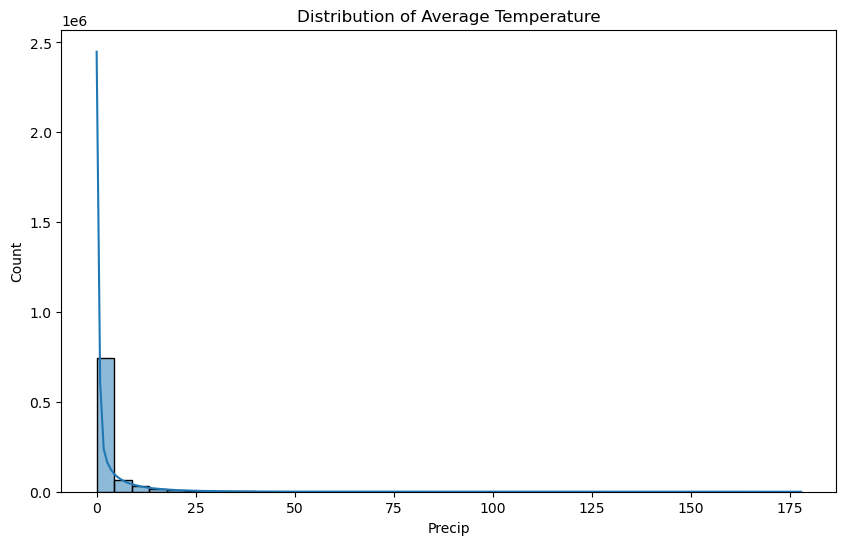

In [47]:
# Precipitation Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(df['Precip'], bins = 40, kde = True)
plt.title ("Distribution of Average Temperature")
plt.show()


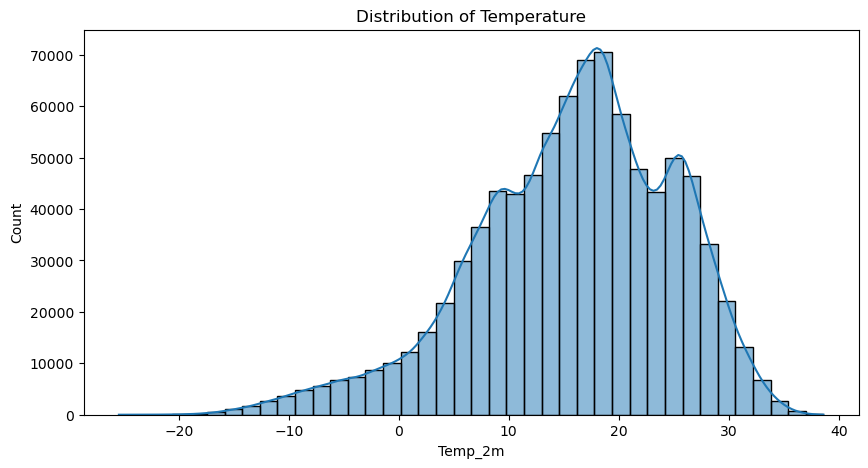

In [48]:
# Distribution of Temperature 
plt.figure(figsize=(10, 5))
sns.histplot(df['Temp_2m'], bins = 40, kde = True)
plt.title("Distribution of Temperature")
plt.show()

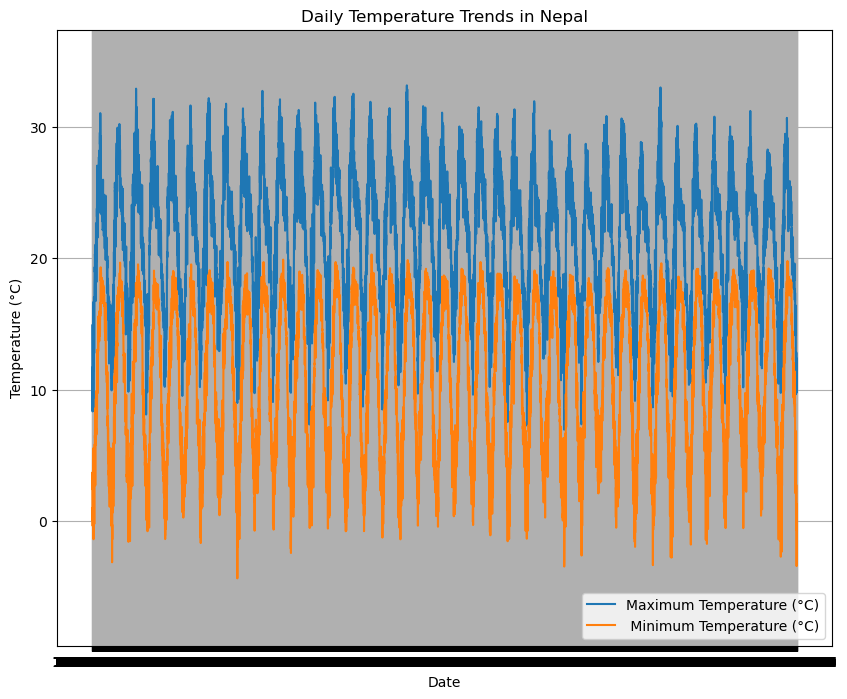

In [49]:
# Trend of Temperature Visualization
plt.figure(figsize=(10, 8))
sns.lineplot(data= df, x = 'Date', y='MaxTemp_2m', label= 'Maximum Temperature (°C)')
sns.lineplot(data = df, x = 'Date', y ='MinTemp_2m', label = ' Minimum Temperature (°C)')
plt.title("Daily Temperature Trends in Nepal")
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


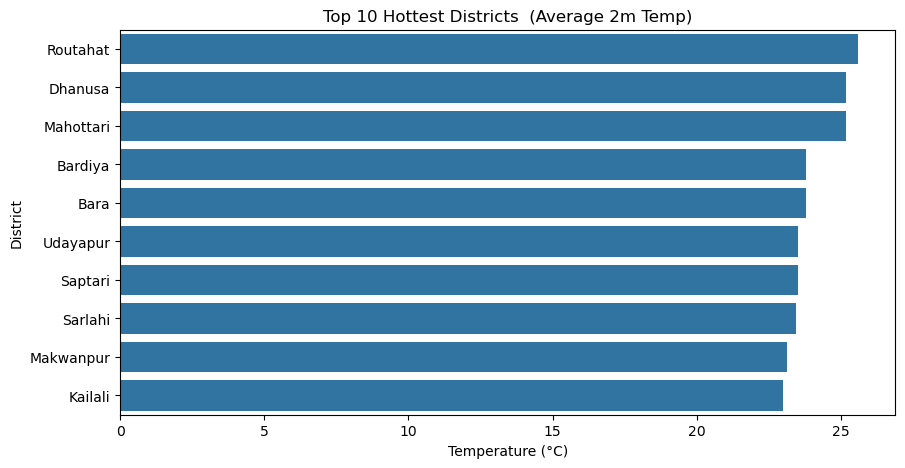

In [52]:
# Average Temperature by District 
district_avg_temp = df.groupby('District')['Temp_2m'].mean().sort_values(ascending= False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x = district_avg_temp.values, y = district_avg_temp.index)
plt.title('Top 10 Hottest Districts  (Average 2m Temp)')
plt.xlabel('Temperature (°C)')
plt.show()

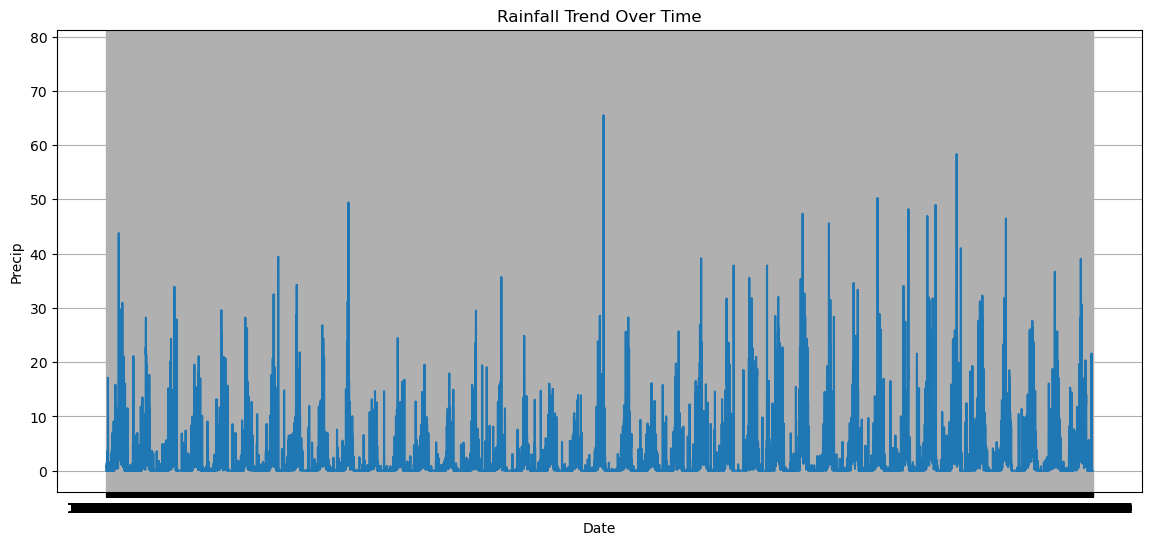

In [53]:
# Rainfall Trend Over Time 
plt.figure(figsize= (14, 6))
sns.lineplot(data = df, x = 'Date', y = 'Precip' )
plt.title('Rainfall Trend Over Time')
plt.grid(True)
plt.show()

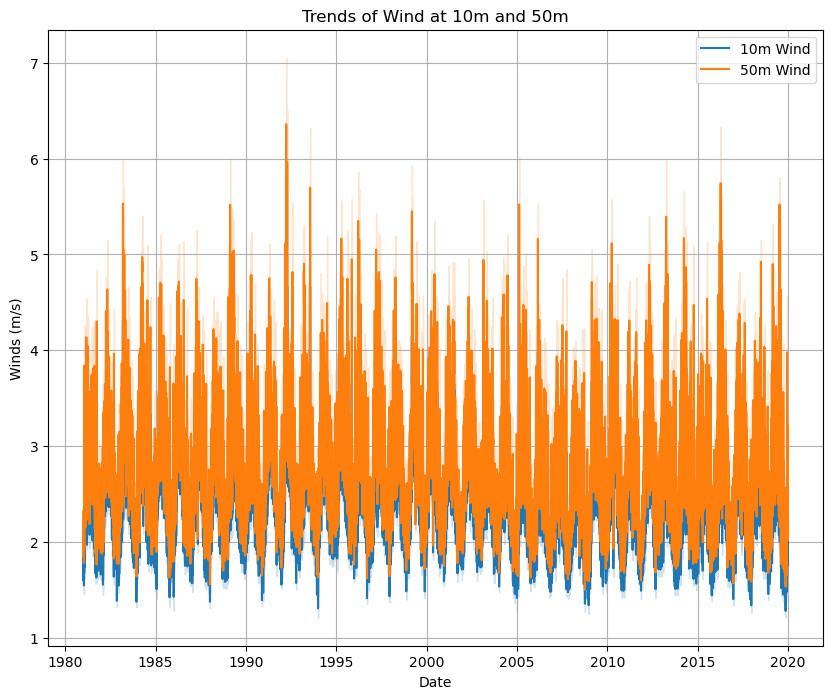

In [35]:
# Trends of Wind Speed 
plt.figure(figsize = (10, 8))
sns.lineplot(data= df, x = 'Date', y = 'WindSpeed_10m', label = '10m Wind')
sns.lineplot(data = df, x = 'Date',y = 'WindSpeed_50m', label = '50m Wind')
plt.title('Trends of Wind at 10m and 50m')
plt.ylabel('Winds (m/s)')
plt.legend()
plt.grid(True)
plt.show()

## Extracting Year and Month from Date 
- Save it in processed data 

In [54]:
#Convert the Date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year and Month 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month 


In [55]:
# Save to processed file
df.to_csv('/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/processed/nepal_daily_climate_with_month_year.csv', index=False)

# Optional check
print(df[['Date', 'Year', 'Month']].head())

        Date  Year  Month
0 1981-01-01  1981      1
1 1981-01-02  1981      1
2 1981-01-03  1981      1
3 1981-01-04  1981      1
4 1981-01-05  1981      1


In [58]:
# Load Processed dataset 
Processed_df = pd.read_csv('/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/processed/nepal_daily_climate_with_month_year.csv')

In [59]:
print(Processed_df.columns)

Index(['Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip',
       'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m', 'Year', 'Month'],
      dtype='object')


### Sample datasets to upload in Github 
- Use engineered datsets as base and get sample off of it. 




In [9]:
engineered_df = pd.read_csv("/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/processed/nepal_daily_climate_engineered.csv")
sample_df = engineered_df.head(500)
sample_df.to_csv("/Users/mandiraghimire/Desktop/MghiGitManu/capstone-project-Mandiraghi/climate_impact_nepal/data/processed/sample_nepal_climate.csv", index = False)